# LAB12 - CLustering pt II 
Author: Dorota Lączak, ISZ

In [64]:
from sklearn.datasets import make_blobs

In [65]:
import matplotlib.pyplot as plt


## Dendrograms

In [66]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

### Ex.1 Plot the data.


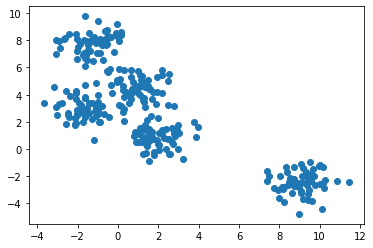

In [67]:
plt.plot(X[:, 0], X[:, 1], 'o')

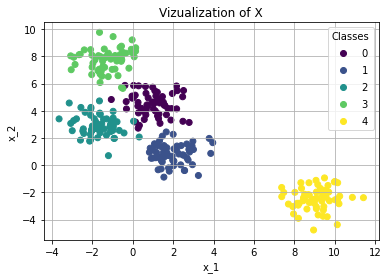

In [68]:
import matplotlib.pyplot as plt

scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

### Ex.2 Use the Means function with k=2 to assign points to clusters.


In [69]:
from sklearn.cluster import KMeans

In [70]:
k_means_2 = KMeans(n_clusters=2)
k_means_2.fit(X)

y_pred = k_means_2.predict(X)

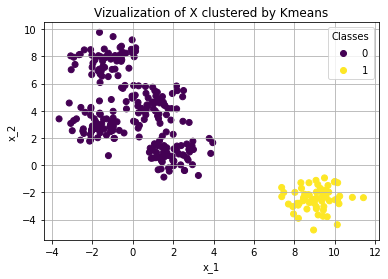

In [71]:
import matplotlib.pyplot as plt

scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Vizualization of X clustered by Kmeans")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

### Ex.3 Use the scipy libraries to draw the dendrogram for the data:


In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage


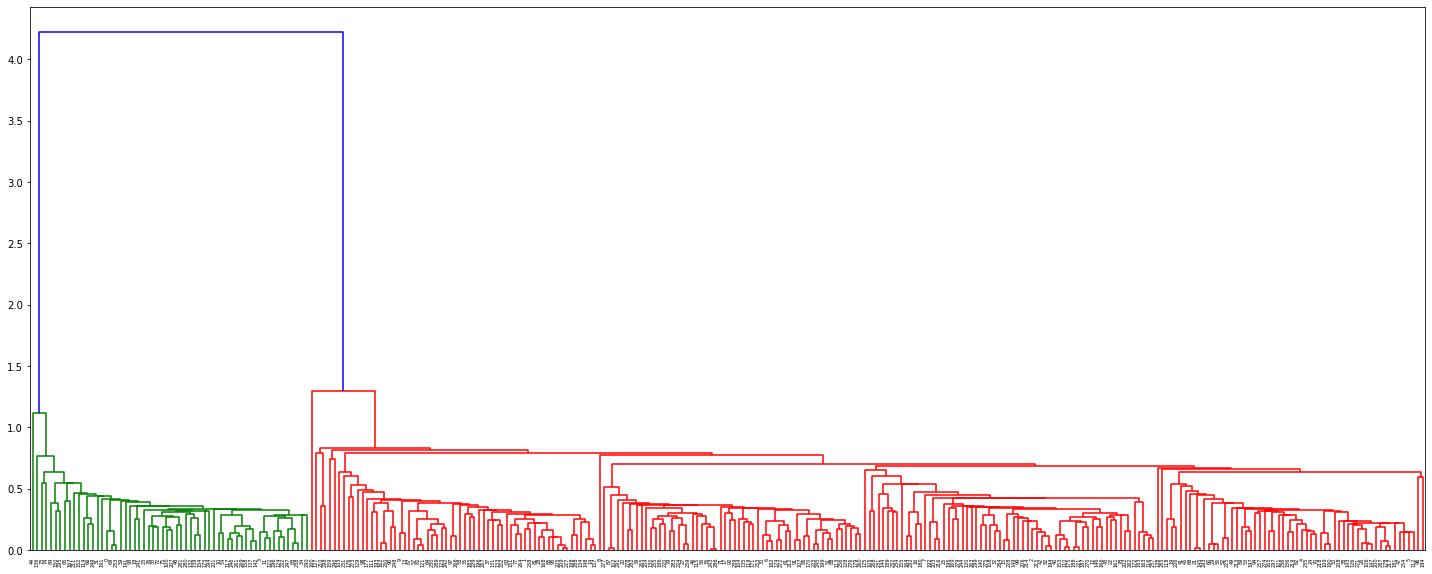

In [73]:

Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

### Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.


In [74]:
X, y_true = make_blobs(n_samples=50, centers=5,
                       cluster_std=0.8, random_state=0)


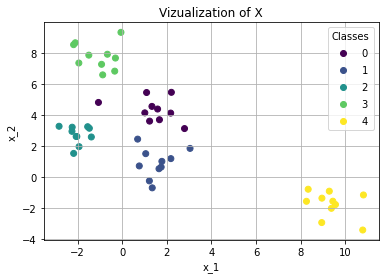

In [75]:
import matplotlib.pyplot as plt

scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Vizualization of X")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(*scatter_plt.legend_elements(),  title="Classes")

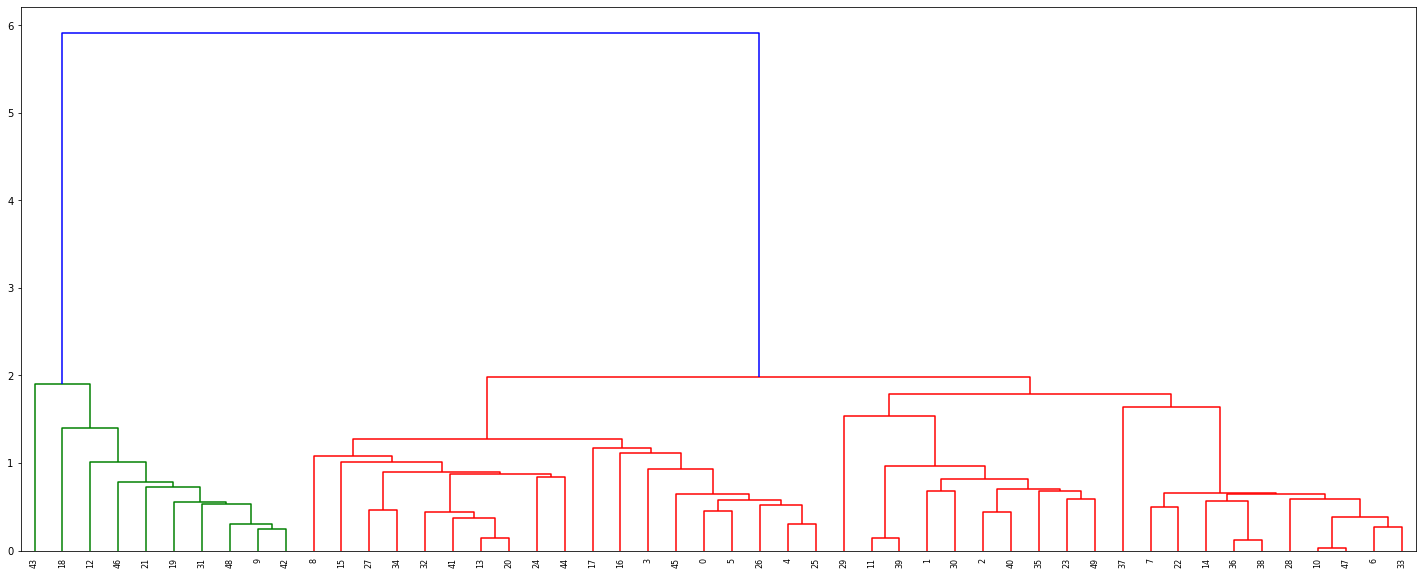

In [76]:

Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

## Agglomerative clustering


### Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.


In [77]:
 import pandas as pd

shopping_df = pd.read_csv("shopping_data.csv")
shopping_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
useful_shopping_df = shopping_df.drop(["CustomerID"], axis="columns")
useful_shopping_df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [79]:
X = useful_shopping_df.drop(["Genre", "Age"], axis="columns").values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

### Ex.6 Create a dendrogram to chose the appropriate k value.

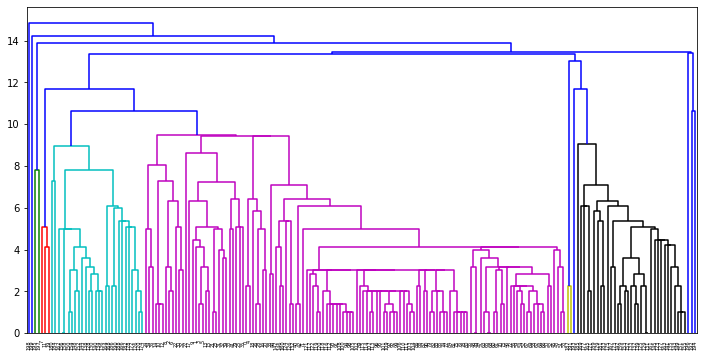

In [80]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(12, 6))
dn = dendrogram(Z)
plt.show()

###7 Ex.7 Analyse results for different linkage values
 - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).)

In [81]:
linkage_methods = ['ward', 'complete', 'average', 'single']

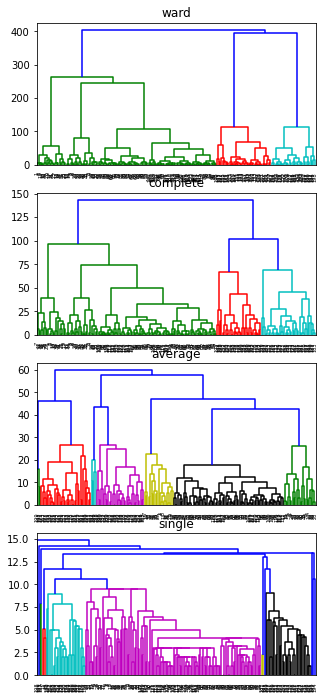

In [82]:
fig, axs = plt.subplots(len(linkage_methods),figsize=(5, 12))
# fig = plt.figure(figsize=(25, 10))

for i in range (len(linkage_methods)):
  Z = linkage(X, linkage_methods[i])
  dn = dendrogram(Z, ax=axs[i])
  axs[i].set_title(linkage_methods[i])


plt.show()

### Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.
ANd 
### Ex.9 Plot the clusters to see how actually our data has been clustered.



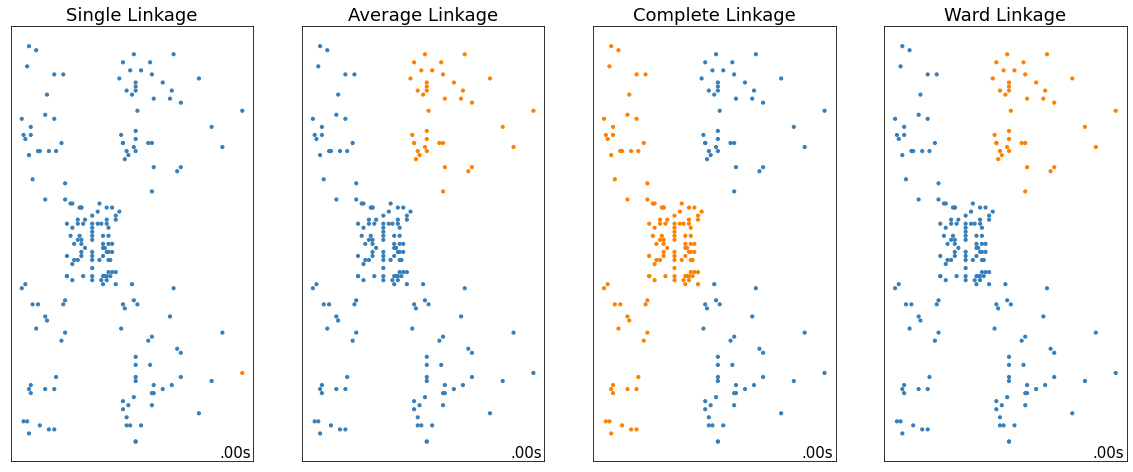

In [83]:
# inspired by: https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html

from sklearn import cluster
import time, warnings
import numpy as np
from itertools import cycle, islice


from sklearn.preprocessing import StandardScaler
# X, y = dataset

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# ============
# Create cluster objects
# ============
ward = cluster.AgglomerativeClustering(linkage='ward')
complete = cluster.AgglomerativeClustering(linkage='complete')
average = cluster.AgglomerativeClustering( linkage='average')
single = cluster.AgglomerativeClustering(linkage='single')

clustering_algorithms = (
('Single Linkage', single),
('Average Linkage', average),
('Complete Linkage', complete),
('Ward Linkage', ward),
)

plot_num = 1 
plt.figure(figsize=(20, 8))

for name, algorithm in clustering_algorithms:
  t0 = time.time()

  # catch warnings related to kneighbors_graph
  with warnings.catch_warnings():
      warnings.filterwarnings(
          "ignore",
          message="the number of connected components of the " +
          "connectivity matrix is [0-9]{1,2}" +
          " > 1. Completing it to avoid stopping the tree early.",
          category=UserWarning)
      algorithm.fit(X)

  t1 = time.time()
  if hasattr(algorithm, 'labels_'):
      y_pred = algorithm.labels_.astype(int)
  else:
      y_pred = algorithm.predict(X)

  plt.subplot(1, len(clustering_algorithms), plot_num)
  plt.title(name, size=18)

  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                        '#f781bf', '#a65628', '#984ea3',
                                        '#999999', '#e41a1c', '#dede00']),
                                int(max(y_pred) + 1))))
  plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
  # plt.scatter(X[:,0], X[:,1], c=y_pred)


  # plt.xlim(-2.5, 2.5)
  # plt.ylim(-2.5, 2.5)
  plt.xticks(())
  plt.yticks(())
  plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
            transform=plt.gca().transAxes, size=15,
            horizontalalignment='right')
  plot_num+=1
plt.show()

## Selecting the number of clusters with silhouette analysis on KMeans clustering

### Ex.1 Create the dataset:


In [84]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
 

### Ex.2 Determine the cluster range [2,3….]


In [85]:
cluster_range = range(2, 10)

### Ex.3 Iterate for all the values in cluster range:
- Perform k-Means
- Calculate and print the silhouette_score
- Compute the silhouette scores for each sample more
- Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot
- Have a look here to check you solution and plot the silhouette plot more

In [86]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

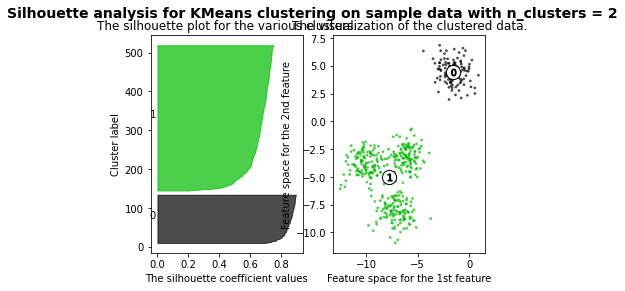

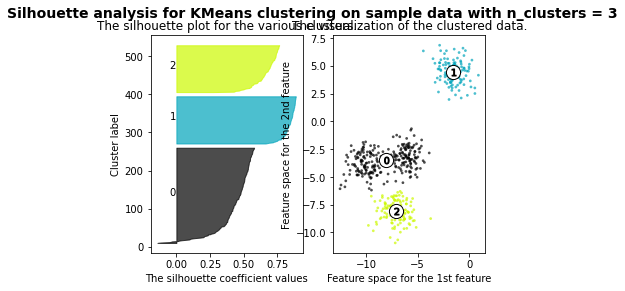

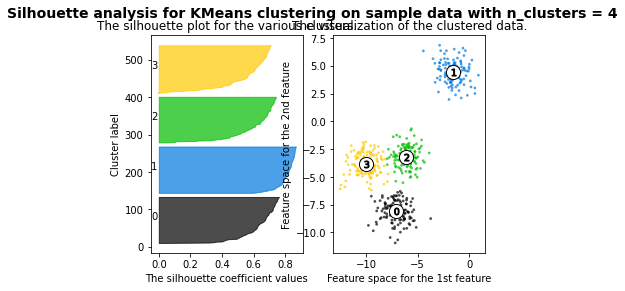

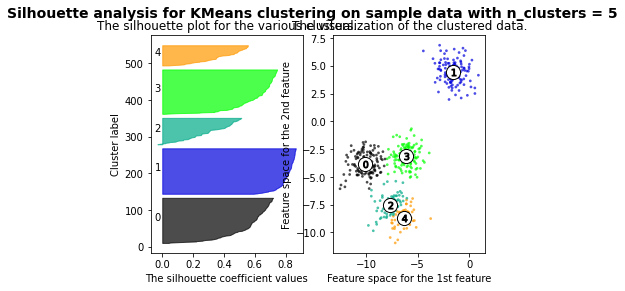

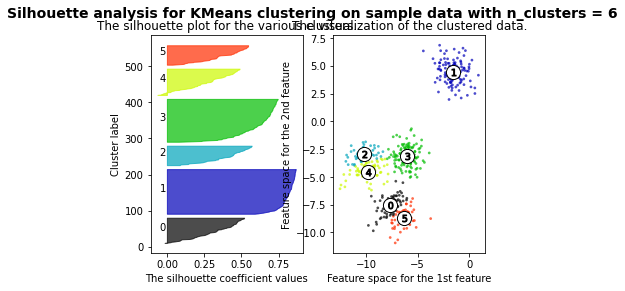

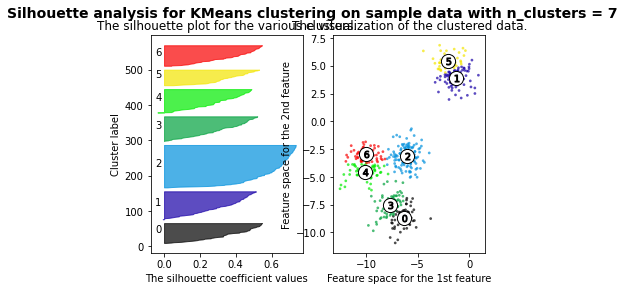

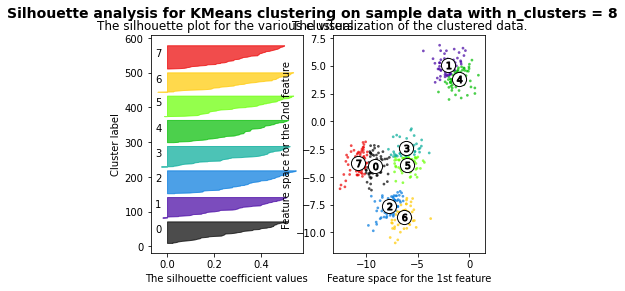

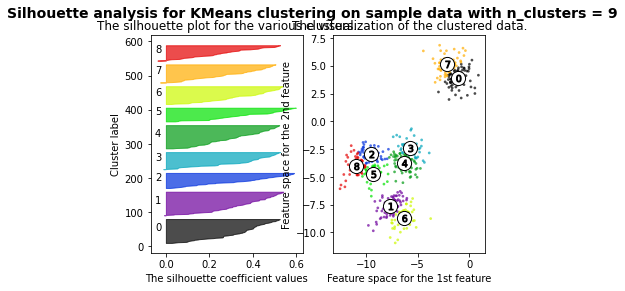

In [87]:
# inspired by https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py


for n_clusters in cluster_range:
  fig, (ax1, ax2) = plt.subplots(1, 2)

  k_means = KMeans(n_clusters=n_clusters)
  k_means.fit(X)
  y_pred_kmeans = k_means.predict(X)

  silhouette_values = silhouette_samples(X, y_pred_kmeans, metric='euclidean')

  y_lower = 10
  for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        silhouette_values[y_pred_kmeans == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")
  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(y_pred_kmeans.astype(float) / n_clusters)
  ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors, edgecolor='k')
 # Labeling the clusters
  centers = k_means.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
              c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                  s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')



## DBSCAN algorithm


### Ex.1 Comparing different (KMeans, agglomerative, DBSCAN) clustering algorithms on following datasets:


In [88]:
from sklearn import  datasets
 
 
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [89]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

#### DBSCAN

In [90]:
clustering_dbscan = DBSCAN(min_samples=5).fit(X)

Text(0, 0.5, 'x_2')

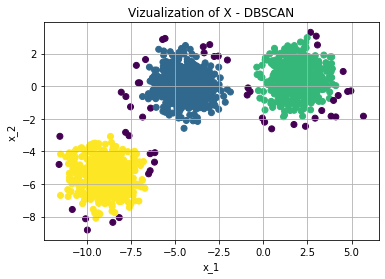

In [91]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=clustering_dbscan.labels_)
plt.title("Vizualization of X - DBSCAN")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")


#### Agglomerative Clustering

In [92]:
clustering_agglomerative = AgglomerativeClustering(n_clusters=3).fit(X)


Text(0, 0.5, 'x_2')

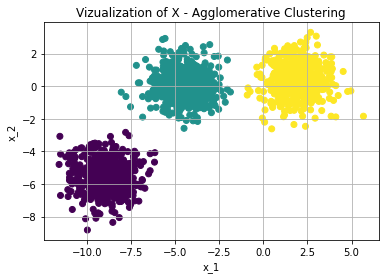

In [93]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=clustering_agglomerative.labels_)
plt.title("Vizualization of X - Agglomerative Clustering")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")


#### KMeans

In [94]:
k_means = KMeans(init='random', n_clusters=3)
k_means.fit(X)
y_pred_k_means = k_means.predict(X)

Text(0, 0.5, 'x_2')

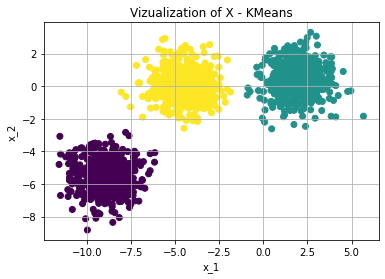

In [95]:
scatter_plt = plt.scatter(X[:,0], X[:,1], c=y_pred_k_means)
plt.title("Vizualization of X - KMeans")
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")